# <b>1 <span style='color:#886ce4'>|</span> Introduction</b>
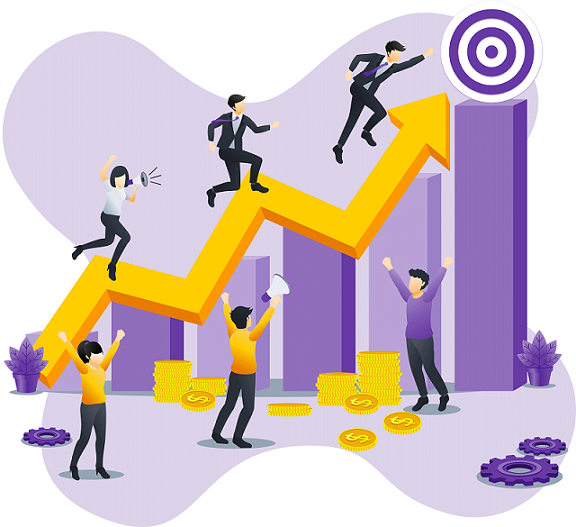

### 🟣 Objective of the kernal

> Explanation of how to make a model that predicts the date on which customers will pay their debts, in addition to making a full analysis of the dataset, after reading many articles and understanding what accounts receivable are, I hope that the carnal will be useful and valuable.

### 🟣 Models used in this project are:

1. LinearRegression, Ridge,Lasso
2. KNeighborsRegressor
3. GradientBoostingRegressor
4. ExtraTreesRegressor, RandomForestRegressor
5. DecisionTreeRegressor

### 🟣 Define some important terms:

 #### What Is Accounts Receivable (AR)
> Accounts receivable (AR) is the balance of money due to a firm for goods or services delivered or used but not yet paid for by customers. Accounts receivables are listed on the balance sheet as a current asset. AR is any amount of money owed by customers for purchases made on credit.
> 

 #### What Is an Invoice?
> An invoice is a time-stamped commercial document that itemizes and records a transaction between a buyer and a seller. If goods or services were purchased on credit, the invoice usually specifies the terms of the deal and provides information on the available methods of payment.
> 

#### What is an Invoice Number?
> An invoice number is a unique number generated by a business issuing an invoice to a client. This number is included on the invoice and it is used for payment tracking purposes.
> 

#### What is an Invoice Dispute?

> An invoice dispute occurs when a client decides they shouldn’t be responsible to pay an invoice, for whatever reason it may be. Disputes in account receivables can have a serious impact on a company’s cash flow and severely affect its financial health. In some cases, up to 5% of invoices are written off due to invoice disputes. So the trick is, learning how to avoid invoice disputes while keeping your customer relationships intact. 
> 


#### <center>💡 For a better understanding of the kernal, it is better to read about what are accountant receivables</center>

# <b>2 <span style='color:#886ce4'>|</span> Import libraries</b>

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.metrics import explained_variance_score,r2_score
from time import time

# Used Models
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


# Measure the efficiency of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.impute import SimpleImputer # For missing data
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split





# <b>3 <span style='color:#886ce4'>|</span> Reading Data</b>

In [ ]:
PATH_df = '../input/finance-factoring-ibm-late-payment-histories/WA_Fn-UseC_-Accounts-Receivable.csv'
df = pd.read_csv(PATH_df)
df.sample(5)

In [ ]:
df.info()

> * The data is divided into 7 features of the Object type, 4 features of the Int type and only one type of float.
> * There is no missing data.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#886ce4;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>2.1 | Quick review of the data  </b></p>
</div>. 

In [ ]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

In [ ]:
df.nunique().to_frame(name='Unique values')

<div style="color:white;display:fill;border-radius:8px;
            background-color:#886ce4;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>2.2 | Reshaping the data  </b></p>
</div>. 

In [ ]:
# Change the type of these columns to reduce the usage of memory, besides , they won't be used in any operations
df['countryCode'] = df['countryCode'].astype(object)
df['invoiceNumber'] = df['invoiceNumber'].astype(object)

In [ ]:
# We will make a new column that replaces the country code with the name of the country that may be useful in our analysis
df['countryName'] = df['countryCode'].replace({ 391:'Germany',406:'Australia',818:'California, US',897:'Kansas, US',770:'Georgia, US' })
df.drop('countryCode',axis = 1,inplace = True)

country_frame = pd.DataFrame({'Germany':[391],'Australia':[406], 'California, US':[818],'Kansas, US ':[897], 'Georgia, US':[770] })
country_frame

# <b>4 <span style='color:#886ce4'>|</span> Exploratory Analysis</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#886ce4;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
              ;color:white;"><b>4.1 | Distance from Billing Date </b></p> </div> 

> In many companies, the majority of all invoices are billed at the end of the month. If you run the aging report a few days later, it will likely still show outstanding accounts receivable from one month ago for which payment is about to arrive, as well as the full amount of all the receivables that were just billed. In total, it appears that receivables are in a bad state. However, if you were to run the report just prior to the month-end billing activities, there would be far fewer accounts receivable in the report, and there may appear to be very little cash coming from uncollected receivables.
> 


In [ ]:
def year_2013(string):
    if '2013' in string:
        return True
    else:
        return False

year_2013 = df[df['DueDate'].apply(lambda x: year_2013(x))]

def year_2012(string):
    if '2012' in string:
        return True
    else:
        return False

year_2012 = df[df['DueDate'].apply(lambda x: year_2012(x))]


def year_2014(string):
    if '2014' in string:
        return True
    else:
        return False

year_2014 = df[df['DueDate'].apply(lambda x: year_2014(x))]

plt.figure(figsize = (10,5))
sns.barplot(x=[2012,2013,2014], y=[year_2012['DaysLate'].sum(), year_2013['DaysLate'].sum(), year_2014['DaysLate'].sum()],
                 palette = 'YlOrBr', saturation=.5)
plt.show()

#### I wonder why in those two years specifically, the percentage is very high, while in 2014 the percentage is almost zero

In [ ]:
keys = list(dict(year_2012.groupby(['countryName']).sum()['DaysLate']).keys())
items = list(dict(year_2012.groupby(['countryName']).sum()['DaysLate']).values())

plt.figure(figsize = (10,5))

sns.barplot(x=items, y=keys, palette = 'YlOrBr', saturation=.5)
plt.title('Countries that are late in paying invoices for 2012', fontsize = 16)
plt.xlabel('Total Number of Days')
plt.ylabel('CountryName')
plt.show()

In [ ]:
keys = list(dict(year_2013.groupby(['countryName']).sum()['DaysLate']).keys())
items = list(dict(year_2013.groupby(['countryName']).sum()['DaysLate']).values())

plt.figure(figsize = (10,5))

sns.barplot(x=items, y=keys, palette = 'YlOrBr', saturation=.5)
plt.title('Countries that are late in paying invoices for 2013', fontsize = 16)
plt.xlabel('Total Number of Days')
plt.ylabel('CountryName')
plt.show()

In [ ]:
keys = list(dict(year_2014.groupby(['countryName']).sum()['DaysLate']).keys())
items = list(dict(year_2014.groupby(['countryName']).sum()['DaysLate']).values())

plt.figure(figsize = (10,5))

sns.barplot(x=items, y=keys, palette = 'YlOrBr', saturation=.5)
plt.title('Countries that are late in paying invoices for 2014', fontsize = 16)
plt.xlabel('Total Number of Days')
plt.ylabel('CountryName')
plt.show()


#### <center>💡 The company must have suffered in those two years because of the delay in collecting dues</center>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#886ce4;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
              ;color:white;"><b>4.2 | Time Bucket Size </b></p> </div> 
             
We will now create 4 groups, each group containing the expected amounts
1. 0 - 30 days
2. 31-60 days
3. 61-90 days
4. 90 days

This helps the company to make decisions, anticipate the amounts to be collected, pay its own debts, purchase new goods, services...

In [ ]:

group_1 = df[df['DaysToSettle'] < 30]['InvoiceAmount'].sum()
group_2 = df[(df['DaysToSettle'] > 30) & (df['DaysToSettle'] < 60)]['InvoiceAmount'].sum()
group_3 = df[(df['DaysToSettle'] > 60) & (df['DaysToSettle'] < 90)]['InvoiceAmount'].sum()
group_4 = df[df['DaysToSettle'] == 90]['InvoiceAmount'].sum()


categories = ['0-30','31-60','61-90','90']
plt.figure(figsize = (10,6))
sns.barplot(y=[group_1, group_2, group_3, group_4], x= categories, palette='YlOrBr', saturation=.5)
plt.title(' Time Bucket Size', fontsize = 16)
plt.xlabel('Categories')
plt.ylabel('Collected Invoices')
plt.show()

#### <center>💡 Most of the payments are collected within a month and the maximum often 60 days</center>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#886ce4;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
              ;color:white;"><b>4.3 | Ratio between on-time and late-payers of all times</b></p> </div> 

In [ ]:
on_time = df[df['DaysLate'] == 0]['customerID'].count()
late = df[df['DaysLate'] != 0 ]['customerID'].count()
labels = ['On Time', 'Late']

plt.figure(figsize = (11,7))
colors = sns.color_palette('YlOrBr')
pie = plt.pie([on_time, late], labels = labels, autopct = '%0.0f%%',colors = colors)

plt.legend(['On time', 'Late'],loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#886ce4;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
              ;color:white;"><b>4.4 | Trend Analysis</b></p> </div> 

> I want to know the trend of receivables during the year, is it increasing? Is it decreasing? Of course, the more this is, the better for the company, because this indicates a greater sale of its products or services. I also want to know the seasons in which they decrease, and of course, the shorter the period in which the bills are paid, the better. I will consider that InvoiceDate is the beginning of the date of purchase

In [ ]:

new_df = df[['InvoiceDate','InvoiceAmount']]
new_df.reset_index()
new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'])
new_df = new_df.set_index('InvoiceDate')

y = new_df['InvoiceAmount'].resample('MS', axis = 0).mean()

In [ ]:
y.plot(figsize = (10,6))
plt.show()

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

# <b>5 <span style='color:#886ce4'>|</span> Feature Engineering</b>

> Our job is to create a model that predicts the number of days that the debtor will be late for payment, so we will modify our data by removing unimportant features in addition to converting the data into an image that the machine understands correctly

#### First, let's create new features of the existing features

In [ ]:
# Changing the type of columns to use pandas time properties
df['PaperlessDate'] = pd.to_datetime(df['PaperlessDate'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DueDate'] = pd.to_datetime(df['DueDate'])
df['SettledDate'] = pd.to_datetime(df['SettledDate'])

date_columns = ['PaperlessDate','InvoiceDate','DueDate','SettledDate']

df['PaperlessDate_year'] = df['PaperlessDate'].dt.year
df['PaperlessDate_day'] = df['PaperlessDate'].dt.day
df['PaperlessDate_month'] = df['PaperlessDate'].dt.month

df['InvoiceDate_year'] = df['InvoiceDate'].dt.year
df['InvoiceDate_month'] = df['InvoiceDate'].dt.month
df['InvoiceDate_day'] = df['InvoiceDate'].dt.day

df['DueDate_year'] = df['DueDate'].dt.year
df['DueDate_month'] = df['DueDate'].dt.month
df['DueDate_day'] = df['DueDate'].dt.day

df['SettledDate_year'] = df['SettledDate'].dt.year
df['SettledDate_month'] = df['SettledDate'].dt.month
df['SettledDate_day'] = df['SettledDate'].dt.day



df.head()

In [ ]:
df.drop(['customerID','invoiceNumber','SettledDate','InvoiceDate','PaperlessDate','DueDate'], axis = 1, inplace = True) # Remove an unimportant column

<div style="color:white;display:fill;border-radius:8px;
            background-color:#886ce4;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
              ;color:white;"><b>5.1 | Encoding</b></p> </div> 

In [ ]:

category = ['countryName'] 
encoded_categ = pd.get_dummies(df[category] ,drop_first=True)

df['Disputed'] = df['Disputed'].replace({'Yes':1, 'No':0})
df['PaperlessBill'] = df['PaperlessBill'].replace({'Electronic':1, 'Paper':0})

#Likning the encoed_cateh with the df
df = pd.concat([df, encoded_categ], axis = 1)


# Dropping the categorical features
df = df.drop(columns = category, axis = 1)

df.head()

##### The reason I used pandas in this process is that I have a small number of columns, but sometimes or even often you will have a lot more in this case there are different techniques, besides, using scikit learn would be better.

#### Now let's modify the type of columns ... 

In [ ]:
columns = list(df.select_dtypes(['object','uint8']).columns)

for i in columns:
    df[i] = df[i].astype('int64')
df.dtypes.to_frame(name='Type')

<div style="color:white;display:fill;border-radius:8px;
            background-color:#886ce4;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
              ;color:white;"><b>5.2 | Feature Selection</b></p> </div> 

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'icefire')
plt.show()

In [ ]:
sns.set_style('white')
sns.set_palette('icefire')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['DaysLate']).sort_values()[:-1].plot.barh()
plt.show()

In [ ]:
df.drop('InvoiceDate_day', axis =1, inplace = True)

In [ ]:
sns.set_style('whitegrid')

sns.lmplot(x="DaysToSettle", y="DaysLate", hue="Disputed", data=df,
           markers=["o", "x"], palette="Set1");

sns.lmplot(x="InvoiceAmount", y="DaysLate", hue="Disputed", data=df,
           markers=["o", "x"], palette="Set1");


##### You can see that the longer the customer requests to pay the bills, this indicates that he will be late in paying the bills at the specified times.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#886ce4;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
              ;color:white;"><b>5.3 | standardization</b></p> </div> 

In [ ]:
num_cols = list(df.columns)
Scaler = StandardScaler()
df[num_cols] = Scaler.fit_transform(df[num_cols])

# <b>6 <span style='color:#886ce4'>|</span> Split Dataset for Training and Testing</b>

In [ ]:
#Select Features
features = df.drop(columns =['DaysLate'], axis = 1)

#Select Target 
target = df['DaysLate']

# Set Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

# <b>7 <span style='color:#886ce4'>|</span> Modelling</b>

In [ ]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

#### Main reason why we are executing so many models together is to find which machine learning model works best for the dataset.

By comparing these results, we can quickly see that GradientBoostingRegressor and RandomForestRegressor are best models to explore further.

If you don't get the quality you were hoping for you can use GridSearchCv to improve the model, but this result satisfies me so I'll stop here.

### <center> Thank You </center>